## Simple Linear regression

In [210]:
import warnings
warnings.filterwarnings('ignore')

In [211]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [212]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [213]:
advertising.shape

(200, 4)

In [214]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [215]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Lets visualise the data

In [216]:
import matplotlib.pyplot as plt 
import seaborn as sns

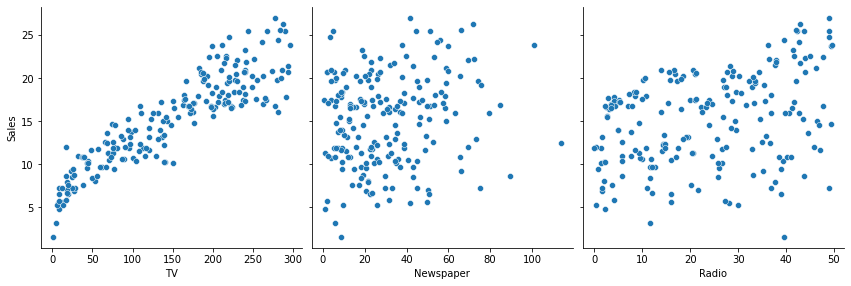

In [217]:
sns.pairplot(advertising,x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4)

<AxesSubplot:>

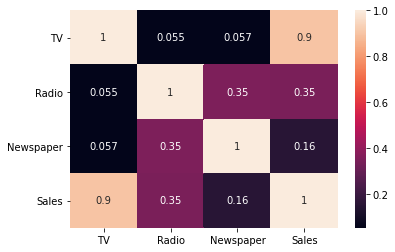

In [218]:
sns.heatmap(advertising.corr(),annot=True)

# Steps:
    - create x and y
    - create test and train set 
    - train ur model on training set 
    - evaluate ur model

In [219]:
#create x and y
X=advertising['TV']
y=advertising['Sales']

In [220]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X ,y ,train_size=0.7 , random_state=100)
print("X_train=",X_train.shape)
print("X_test=",X_test.shape)
print("y_train=",y_train.shape)
print("y_test=",y_test.shape)

X_train= (140,)
X_test= (60,)
y_train= (140,)
y_test= (60,)


In [221]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [222]:
# Training the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [223]:
lr =sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [224]:
# Sales = 6.94 + 0.054.TV

In [225]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.52e-52
Time:                        18:02:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
y_train_predicted = lr_model.predict(X_train_sm)

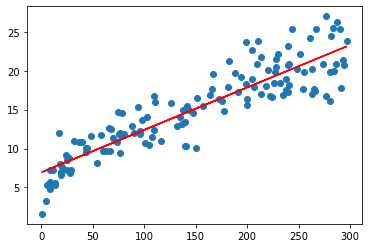

In [227]:
plt.scatter(X_train , y_train)
plt.plot(X_train,y_train_predicted ,'r')

Text(0.5, 1.0, 'Dist plot TV sales.')

<Figure size 432x288 with 0 Axes>

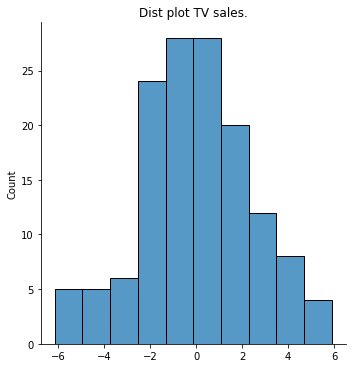

In [228]:
residual = y_train-y_train_predicted
plt.figure()
sns.displot(residual)
plt.title("Dist plot TV sales.")

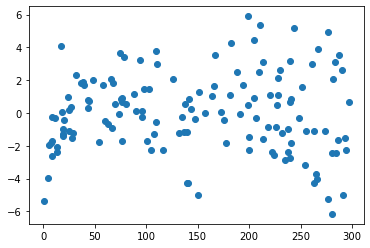

In [229]:
plt.scatter(X_train,residual)
plt.show()

In [230]:
# Add constant/intercept to test set as well like training set we did above
y_test_sm = sm.add_constant(X_test)
y_test_predicted=lr_model.predict(y_test_sm)
y_test_predicted.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [231]:
# R_square
r_square_data = r2_score(y_true=y_test , y_pred=y_test_predicted)
r_square_data

0.7921031601245658

In [232]:
# Mean square error
mean_squared_error(y_true=y_test , y_pred=y_test_predicted)

4.077556371826956

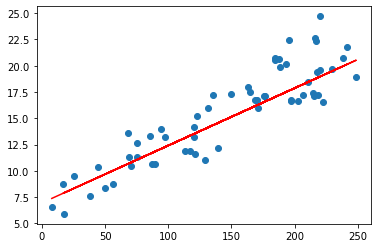

In [233]:
# Test set visualization
plt.scatter(X_test , y_test)
plt.plot(X_test,y_test_predicted ,'r')

In [209]:
#create x and y
X=advertising['Radio']
y=advertising['Sales']

In [66]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X ,y ,train_size=0.7 , random_state=100)
print("X_train=",X_train.shape)
print("X_test=",X_test.shape)
print("y_train=",y_train.shape)
print("y_test=",y_test.shape)

X_train= (140,)
X_test= (60,)
y_train= (140,)
y_test= (60,)


In [67]:
# Training the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,Radio
74,1.0,24.6
3,1.0,41.3
185,1.0,45.1
26,1.0,29.3
90,1.0,4.9


In [68]:
lr =sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params

const    12.164674
Radio     0.123920
dtype: float64

In [69]:
# Sales =12.164674 +0.123920.Radio

In [70]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           5.36e-05
Time:                        03:05:30   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.000      10.552      13.777
Radio          0.1239      0.030      4.169      0.000       0.065       0.183
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.526
Skew:                          -0.384   Prob(JB):                       0.0383
Kurtosis:                       2.273   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

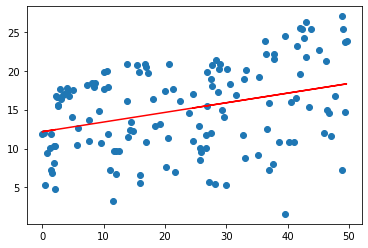

In [71]:
plt.scatter(X_train , y_train)
plt.plot(X_train,12.1647+0.1239*X_train,'r')

In [72]:
#create x and y
X=advertising['Newspaper']
y=advertising['Sales']

In [73]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X ,y ,train_size=0.7 , random_state=100)
print("X_train=",X_train.shape)
print("X_test=",X_test.shape)
print("y_train=",y_train.shape)
print("y_test=",y_test.shape)

X_train= (140,)
X_test= (60,)
y_train= (140,)
y_test= (60,)


In [74]:
# Training the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,Newspaper
74,1.0,13.1
3,1.0,58.5
185,1.0,19.6
26,1.0,12.6
90,1.0,9.3


In [75]:
lr =sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params

const        13.132714
Newspaper     0.059574
dtype: float64

In [76]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Sat, 19 Jun 2021   Prob (F-statistic):            0.00423
Time:                        03:05:31   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1327      0.792     16.574      0.000      11.566      14.699
Newspaper      0.0596      0.020      2.909      0.004       0.019       0.100
==============================================================================
Omnibus:                        9.229   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.890
Skew:                          -0.073   Prob(JB):                        0.143
Kurtosis:                       2.196   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
y_train_predicted = lr_model.predict(X_train_sm)

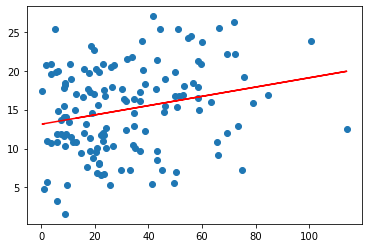

In [78]:
plt.scatter(X_train , y_train)
plt.plot(X_train,y_train_predicted,'r')

## Residual Analysis

In [79]:
# Error = f(y_train , y_train_predicted)
# Here y_train is basically Sales given and y_train_predicted is the sales predicted for y_train 

In [80]:
y_train_predicted = lr_model.predict(X_train_sm)
y_train_predicted.head()

74     13.913131
3      16.617781
185    14.300361
26     13.883344
90     13.686750
dtype: float64

In [81]:
# Now error Analysis

In [82]:
residual = y_train-y_train_predicted

Text(0.5, 1.0, 'Residual Plot')

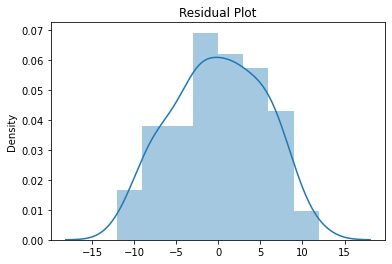

In [83]:
# Plot residual
plt.figure()
sns.distplot(residual)
plt.title("Residual Plot")

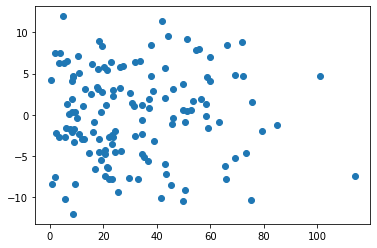

In [84]:
# Look for the pattern of residuals
plt.scatter(X_train , residual )
plt.show()

## Prediction and Evalutaion on the Test Set

In [85]:
# Add constant/intercept to test set as well like training set we did above
y_test_sm = sm.add_constant(X_test)
y_test_predicted=lr_model.predict(y_test_sm)
y_test_predicted.head()

126    16.147148
104    13.448455
99     15.867151
92     16.647568
111    14.514826
dtype: float64

In [86]:
# Now evaluate the model , r-square , on the test set
# r-square to compare on training set and test set , 
#and if r-square is equivalenet or greater for test then model is perfect 
#and if test set r-square is less compared to training set then there is flaw in model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
# R_square
r_square_data = r2_score(y_true=y_test , y_pred=y_test_predicted)
r_square_data

-0.1445736328993592

## Built Linear regression model using sklearn 

In [244]:
# Train test split of data
X_train , X_test,y_train,y_test=train_test_split(X ,y ,train_size=0.7 , random_state=100)

In [245]:
# Reshape to (140,1)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train.shape
X_test.shape

(60, 1)

In [246]:
# Steps in sklearn to built a model
# 1. creata an object of linear regression
lm= LinearRegression()
# 2. fit the model 
lm.fit(X_train , y_train)

LinearRegression()

In [247]:
# 3. see the params 
print(lm.coef_)  # Coef of tv
print(lm.intercept_) # intercept

[0.05454575]
6.948683200001357


In [250]:
#4.Prediction on model.
y_train_predicted = lm.predict(X_train)
print(y_train_predicted)
y_test_predicted = lm.predict(X_test)
print(y_test_predicted)


[18.58874687 15.21236477 18.13056255 14.74327129 14.27417782 11.32325258
 20.02875475 11.76507318  8.00687081 19.26511421 14.37781475  8.3177816
  9.02142181 16.35782558 12.93780687 20.04511848 19.60875245 10.55415747
 18.86147564 19.73966226  8.24687212 10.64688525 23.11604436 14.65599809
 16.49964454 18.97602172 11.11597872 20.79239529 17.37237658 22.63604174
 12.42507679 19.38511486 13.80508434 11.02325094 10.08506399 21.27785249
 21.28876164 19.89784494 19.34147826 17.84692463 19.40147859 22.80513357
 22.05240218 17.84692463 20.00148187 10.95234146 22.45604075 14.9832726
 19.16693185 17.79783345 22.04149303  7.66868714  7.58686851 22.23240317
  9.10324044 21.43603517  8.44869141 22.25967604 11.21416108 15.85600465
 18.59420145 22.96331626  7.96868878 11.06688755 16.04691479  9.38687836
 12.93780687  7.42323125 21.50694465 18.23419948 15.11963699  8.01777996
  8.96142148 17.80874261 21.41421687 15.98145988 14.60145233 19.49966095
  7.24323027  7.92505218 19.89784494 22.54876853 12.0

In [251]:
# 5. Evaluate the model mean get the r2 and compare the value of r2.
print(r2_score(y_true=y_train , y_pred=y_train_predicted))
print(r2_score(y_true=y_test , y_pred=y_test_predicted))

0.8157933136480389
0.7921031601245662
